## Light Curves of Minor Planets
This code finds named minor planets from ZTF 
that have many detections in the light curve, then makes plots of each light curve.

In [1]:
import mysql.connector
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

This SQL query finds the name of the minor planet (ssnamenr) 
and the number of corresponding detections (candidates), ordered with the biggest light curves first.

In [2]:
import settings
msl = mysql.connector.connect(\
            user    =settings.DB_USER, \
            password=settings.DB_PASS, \
            host    =settings.DB_HOST, \
            database='ztf')
cursor = msl.cursor(buffered=True, dictionary=True)
query = 'SELECT ssnamenr, count(*) AS count FROM candidates '
query += 'GROUP BY ssnamenr ORDER BY count DESC LIMIT 20'
cursor.execute(query)
n = cursor.rowcount
print ('found %d minor planets' % n)

found 20 minor planets


For each of the light curves, split out the r and g filter detections (fid=0 and 1), and plot each one.

Object 3774 has 176 detections


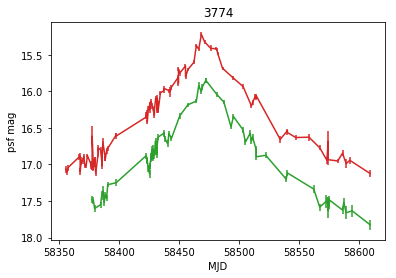

Object 4759 has 168 detections


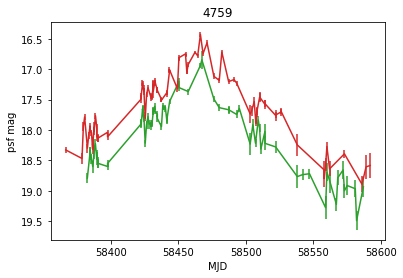

Object 2231 has 165 detections


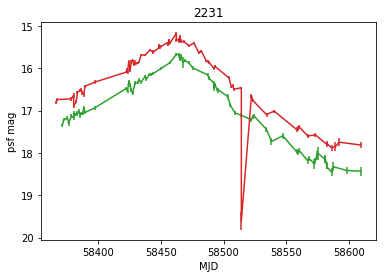

Object 7623 has 164 detections


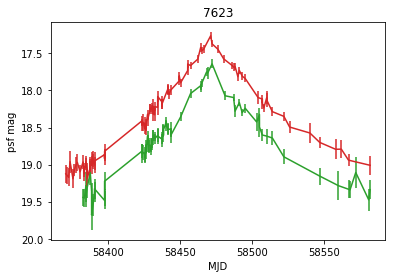

Object 8127 has 155 detections


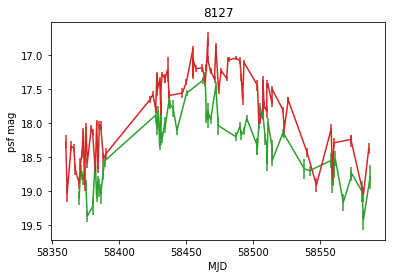

Object 3397 has 153 detections


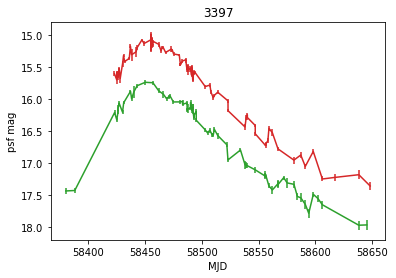

Object 3852 has 153 detections


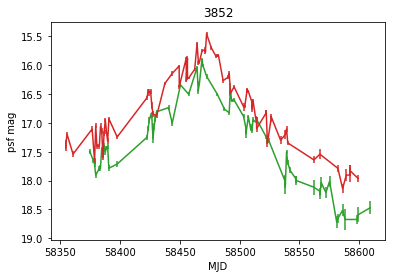

Object 3471 has 153 detections


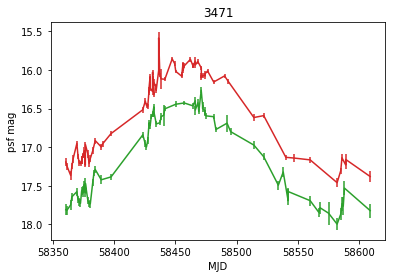

Object 227 has 153 detections


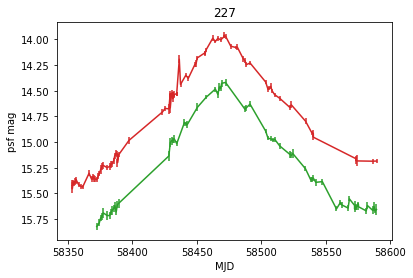

Object 10330 has 152 detections


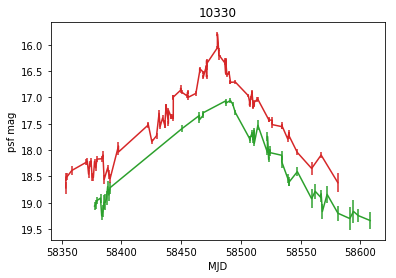

Object 49640 has 151 detections


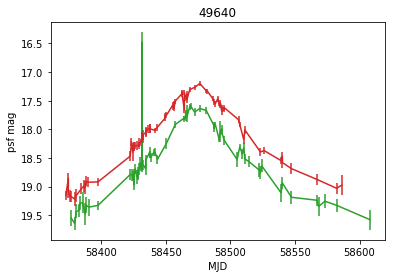

Object 21228 has 150 detections


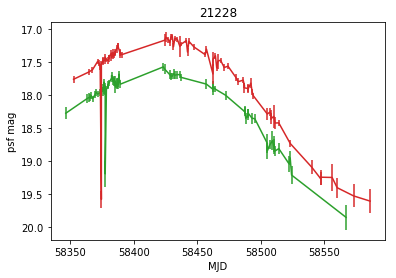

Object 2865 has 150 detections


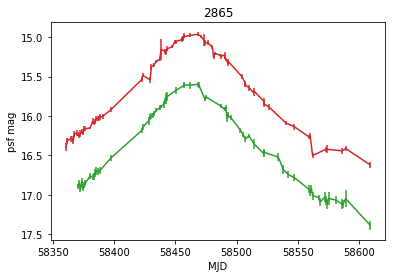

Object 6522 has 150 detections


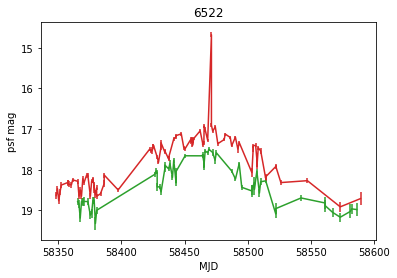

Object 32259 has 149 detections


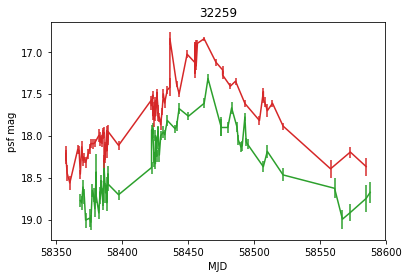

Object 839 has 149 detections


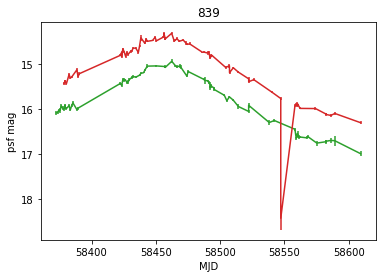

Object 2544 has 148 detections


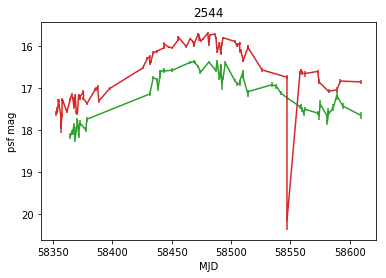

Object 2452 has 147 detections


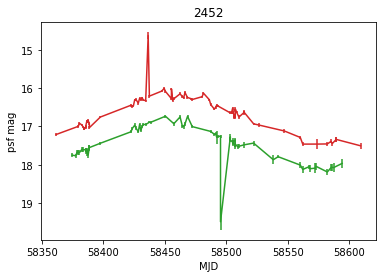

In [3]:
nplot = 0
cursor2 = msl.cursor(buffered=True, dictionary=True)
for row in cursor:
    count = row['count']
    name  = row['ssnamenr']
    if count > 200: continue  # fake values like 'null' and '-999' are very popular
    print('Object %s has %d detections' % (name, count))
    query = 'SELECT jd-2400000.5 AS mjd, magpsf, sigmapsf, fid FROM candidates WHERE ssnamenr = "%s"' % name
    cursor2.execute(query)
    magpsf   = [[],[]]
    mjd      = [[],[]]
    sigmapsf = [[],[]]
    for row2 in cursor2:
        fid = int(row2['fid'])-1
        mjd     [fid].append(row2['mjd'])
        magpsf  [fid].append(row2['magpsf'])
        sigmapsf[fid].append(row2['sigmapsf'])
    plt.errorbar(mjd[0], magpsf[0], yerr=sigmapsf[0], c="C2")
    plt.errorbar(mjd[1], magpsf[1], yerr=sigmapsf[1], c="C3")
    plt.xlabel("MJD")
    plt.ylabel("psf mag")
    plt.title("{}".format(name))
    plt.gca().invert_yaxis()
    plt.show()
    nplot += 1
    if nplot > 30: break